# Importing libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Read excel file

In [2]:
df = pd.read_excel(r'C:\Users\selvi\Downloads\All_Emails.xlsx')

df.drop('Unnamed: 0', axis=1, inplace = True)
df.columns = ['Label', 'Text', 'Label_Number']
df.head()


,Label,Text,Label_Number
0,spam,Why United Kingdom is best study destination_x...,1
1,non_spam,Homeowners are looking for a tenant like you z...,0
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0


In [3]:
df.shape

(980, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         980 non-null    object
 1   Text          980 non-null    object
 2   Label_Number  980 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.1+ KB


In [5]:
df.isna().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

In [6]:
df['Label_Number'].value_counts()

0    938
1     42
Name: Label_Number, dtype: int64

# Count plot

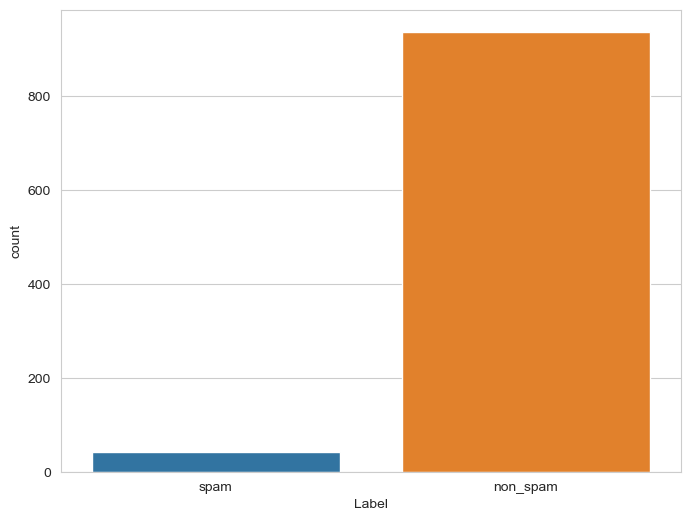

In [7]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Label');

# Tokenization

In [8]:
get_ipython().run_cell_magic('time', '', 'def clean_str(string, reg = RegexpTokenizer(r\'[a-z]+\')):\n    # Clean a string with RegexpTokenizer\n    string = string.lower()\n    tokens = reg.tokenize(string)\n    return " ".join(tokens)\n\nprint(\'Before cleaning:\')\ndf.head()')

Before cleaning:
CPU times: total: 0 ns
Wall time: 1.03 ms


,Label,Text,Label_Number
0,spam,Why United Kingdom is best study destination_x...,1
1,non_spam,Homeowners are looking for a tenant like you z...,0
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0


In [9]:
print('After cleaning:')
df['Text'] = df['Text'].apply(lambda string: clean_str(string))
df.head()


After cleaning:


,Label,Text,Label_Number
0,spam,why united kingdom is best study destination x...,1
1,non_spam,homeowners are looking for a tenant like you z...,0
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0
3,non_spam,profile picture pending approval x d hi rupal ...,0
4,non_spam,mahimagoyal jee main new exam dates out x d,0


# Stemming words

In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['Text']=df['Text'].apply(stemming)
df.head()

,Label,Text,Label_Number
0,spam,why united kingdom is best study destination x...,1
1,non_spam,homeowners are looking for a tenant like you z...,0
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0
3,non_spam,profile picture pending approval x d hi rupal ...,0
4,non_spam,mahimagoyal jee main new exam dates out x d,0


In [11]:
X = df.loc[:, 'Text']
y = df.loc[:, 'Label_Number']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (980,)
shape of y: (980,)


# Split into Training data and Test data 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [13]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Training Data Shape: (784,)
Test Data Shape: (196,)


# Count Vectorization to Extract Features from Text

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [15]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  9246


In [16]:
dtv = cv.transform(X_train)
type(dtv)


scipy.sparse._csr.csr_matrix

In [17]:
dtv = dtv.toarray()

In [18]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 784
Tokens/Features: 9246


In [19]:
dtv[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Apply different models

In [20]:

get_ipython().run_cell_magic('time', '', 'from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.svm import LinearSVC, SVC\nfrom time import perf_counter\nimport warnings\nwarnings.filterwarnings(action=\'ignore\')\nmodels = {\n    "Random Forest": {"model":RandomForestClassifier(), "perf":0},\n    "MultinomialNB": {"model":MultinomialNB(), "perf":0},\n    "Logistic Regr.": {"model":LogisticRegression(solver=\'liblinear\', penalty =\'l2\' , C = 1.0), "perf":0},\n    "KNN": {"model":KNeighborsClassifier(), "perf":0},\n    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},\n    "SVM (Linear)": {"model":LinearSVC(), "perf":0},\n    "SVM (RBF)": {"model":SVC(), "perf":0}\n}\n\nfor name, model in models.items():\n    start = perf_counter()\n    model[\'model\'].fit(dtv, y_train)\n    duration = perf_counter() - start\n    duration = round(duration,2)\n    model["perf"] = duration\n    print(f"{name:20} trained in {duration} sec")')

Random Forest        trained in 1.8 sec
MultinomialNB        trained in 0.12 sec
Logistic Regr.       trained in 0.32 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 1.89 sec
SVM (Linear)         trained in 0.28 sec
SVM (RBF)            trained in 1.38 sec
CPU times: total: 5.75 s
Wall time: 6.08 s


In [21]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

Number of Observations: 196
Tokens: 9246


# Test Accuracy and Training Time

In [22]:

models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [23]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy


,Model,Test Accuracy,Training time (sec)
0,SVM (RBF),0.974490,1.38
1,Logistic Regr.,0.969388,0.32
2,Random Forest,0.964286,1.80
3,KNN,0.964286,0.00
4,Decision Tree,0.964286,1.89
5,SVM (Linear),0.964286,0.28
6,MultinomialNB,0.959184,0.12


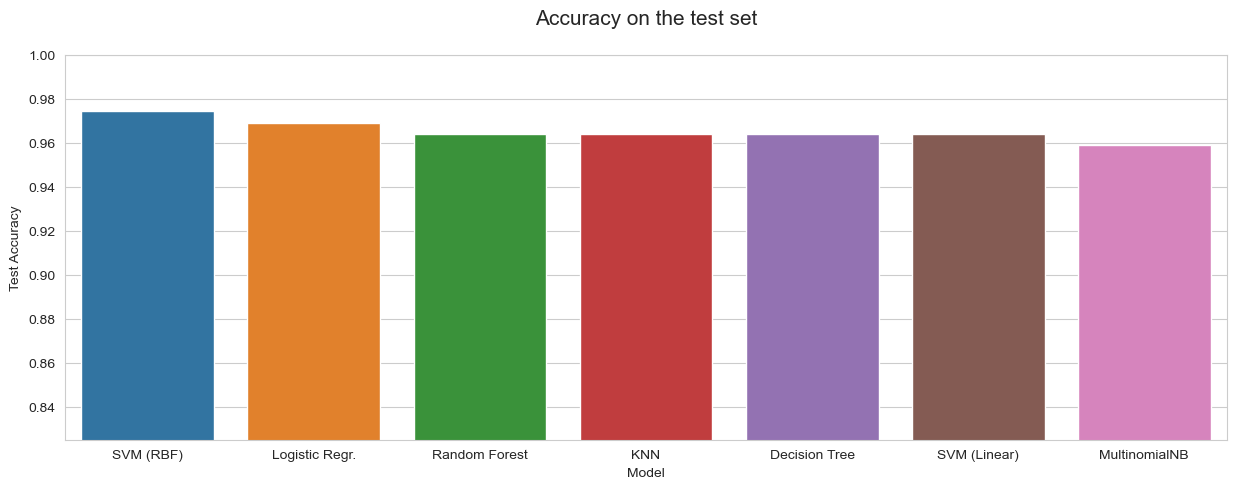

In [24]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

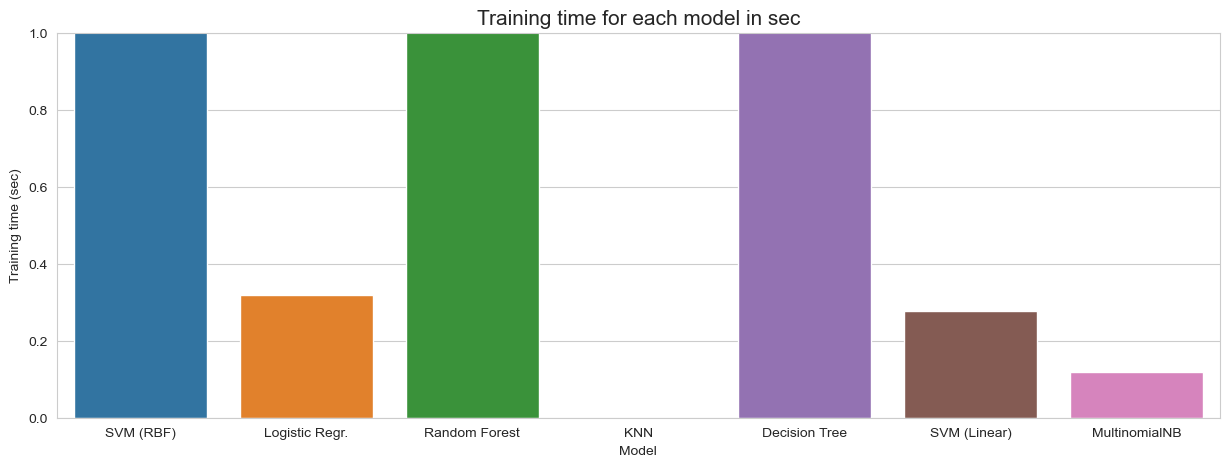

In [25]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()

**Test Accuracy and Training Time**


In [26]:

get_ipython().run_cell_magic('time', '', "lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)\nlr.fit(dtv, y_train)\npred = lr.predict(test_dtv)")


CPU times: total: 344 ms
Wall time: 303 ms


In [27]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


**Classification Report**

In [28]:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



**Confusion Matrix**

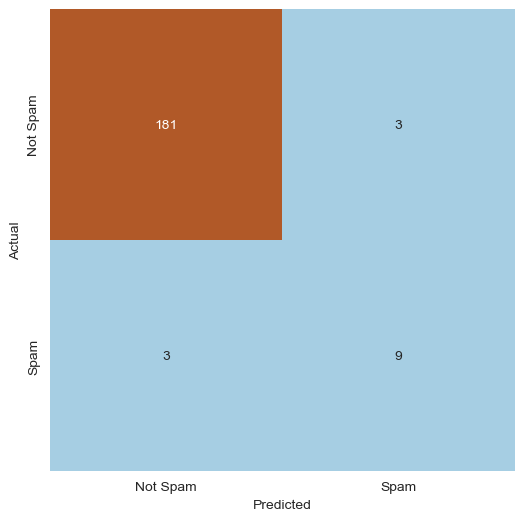

In [29]:

confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

**Support Vector Machine**

In [30]:

get_ipython().run_cell_magic('time', '', 'svc = SVC()\nsvc.fit(dtv, y_train)\npred = svc.predict(test_dtv)')


CPU times: total: 4.81 s
Wall time: 2.22 s


In [31]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.44897959183673


**Classification Report**

In [32]:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       184
           1       1.00      0.58      0.74        12

    accuracy                           0.97       196
   macro avg       0.99      0.79      0.86       196
weighted avg       0.98      0.97      0.97       196



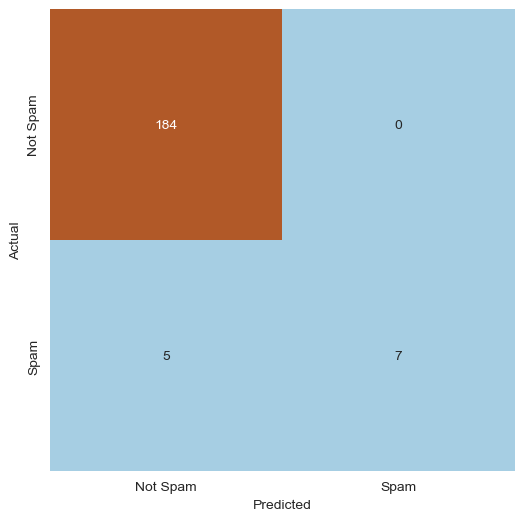

In [33]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


# Random Forest Classifier 

In [34]:

get_ipython().run_cell_magic('time', '', 'rfc = RandomForestClassifier()\nrfc.fit(dtv, y_train)\npred = rfc.predict(test_dtv)')


CPU times: total: 1.38 s
Wall time: 1.81 s


In [35]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [36]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



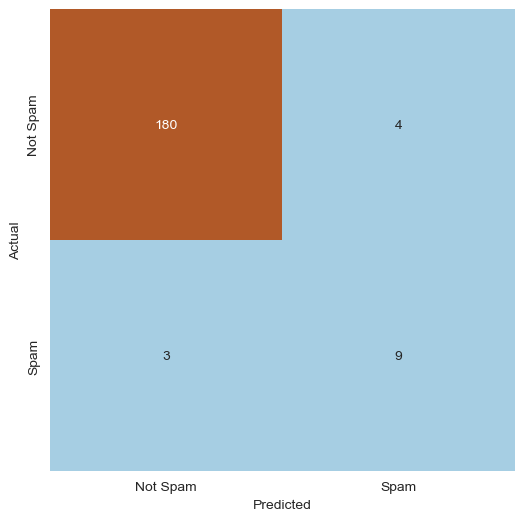

In [37]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [39]:
get_ipython().run_cell_magic('time', '', 'rfc = RandomForestClassifier()\nrfc.fit(dtv, y_train)\npred = rfc.predict(test_dtv)')

CPU times: total: 1.16 s
Wall time: 1.86 s


In [40]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [41]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



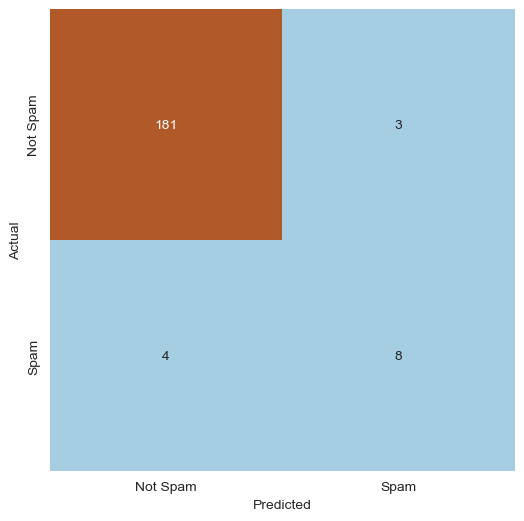

In [42]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


# Multinomial Naive Bayes

In [43]:

get_ipython().run_cell_magic('time', '', 'mnb = MultinomialNB()\nmnb.fit(dtv, y_train)\npred = mnb.predict(test_dtv)')


CPU times: total: 93.8 ms
Wall time: 106 ms


In [44]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


In [45]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.67      0.67      0.67        12

    accuracy                           0.96       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.96      0.96      0.96       196



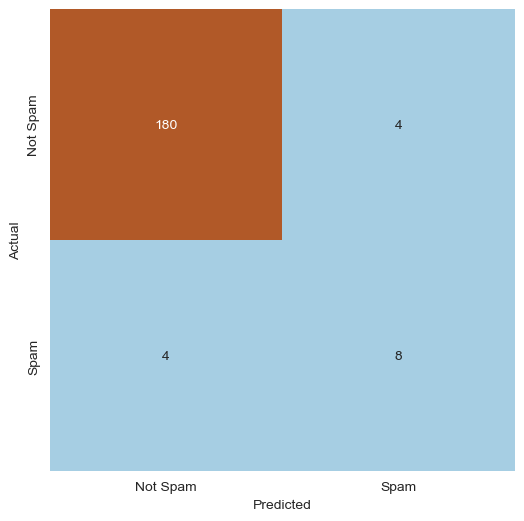

In [46]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


# Support Vector Machine (Linear)

In [47]:

get_ipython().run_cell_magic('time', '', 'lsvc = LinearSVC()\nlsvc.fit(dtv, y_train)\npred = lsvc.predict(test_dtv)')

CPU times: total: 78.1 ms
Wall time: 325 ms


In [48]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [49]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



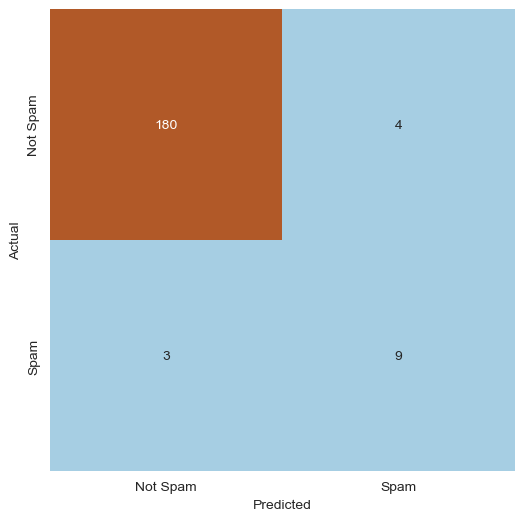

In [50]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


# Decision Tree Classifier

In [51]:

get_ipython().run_cell_magic('time', '', 'dtc = DecisionTreeClassifier()\ndtc.fit(dtv, y_train)\npred = dtc.predict(test_dtv)')


CPU times: total: 672 ms
Wall time: 1.86 s


In [52]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [53]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



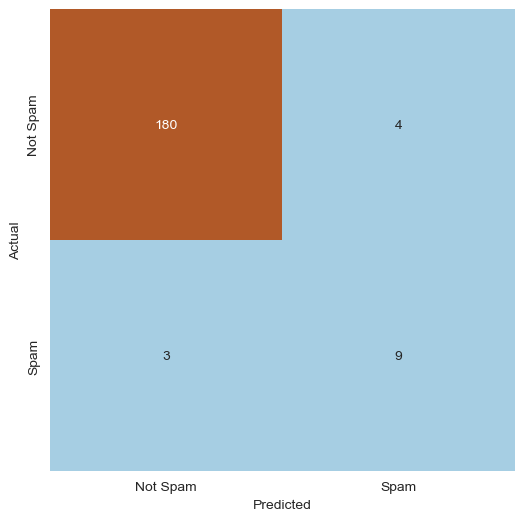

In [54]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


# K Nearest Neighbours

In [55]:

get_ipython().run_cell_magic('time', '', 'knn = KNeighborsClassifier()\nknn.fit(dtv, y_train)\npred = knn.predict(test_dtv)')


CPU times: total: 391 ms
Wall time: 275 ms


In [56]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [57]:
#Classification Report\
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



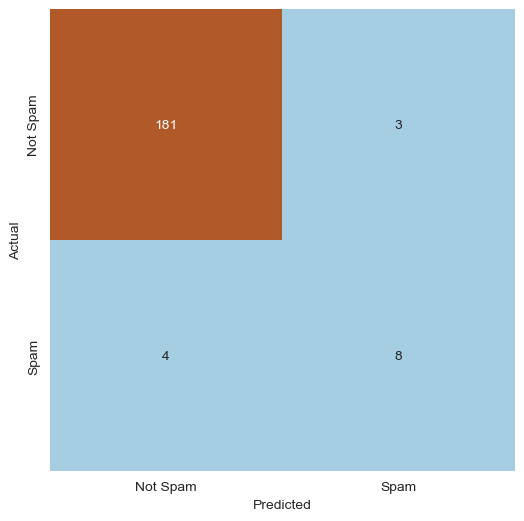

In [58]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);